<a href="https://colab.research.google.com/github/FarzinRad/Analyzing-Bank-Marketing-Campaign-Data/blob/main/Analyzing%20Bank%20Marketing%20Campaign%20Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyzing Bank Marketing Campaign Data

In this project i want to Analyzing Bank Marketing Campaign Data from a bank in the Portuguese banking institution.

The data is related with direct marketing campaigns (phone calls). and come from a public dataset from:

https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

Also, you can find it in my github repo: https://github.com/FarzinRad/Analyzing-Bank-Marketing-Campaign-Data

I'll use the **google colab** to do analysis and find patterns.

Moreover, I'll use the **linear and logestic regression** to predict the future patterns. **(Without Sklearn libraries)**

Finally, I'll try to provide a generic framework for **identifying causalities and effects** when performing data analysis.

in the continue I put data descripton for a better underastanding of the dataset.

## Source:

[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014


Data Set Information:

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

There are four datasets:
1) bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
2) bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
3) bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).
4) bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).
The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM).

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).


Attribute Information:

Input variables:
### bank client data:
1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

### related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### other attributes:

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

### social and economic context attributes

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

**Output variable (desired target):**

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [19]:
# Import data from my git repository 

df = pd.read_csv('https://raw.githubusercontent.com/FarzinRad/Analyzing-Bank-Marketing-Campaign-Data/main/bank-additional-full.csv', sep=';')

In [20]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [21]:
# Check the null values
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [22]:
# Check the data types
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [23]:
# Describe numerical values
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## Analyzing Distributions of Numerical Features in the Banking Dataset

In this section we a little more deep dive in the dataset and try to find basicly and initial patterns.

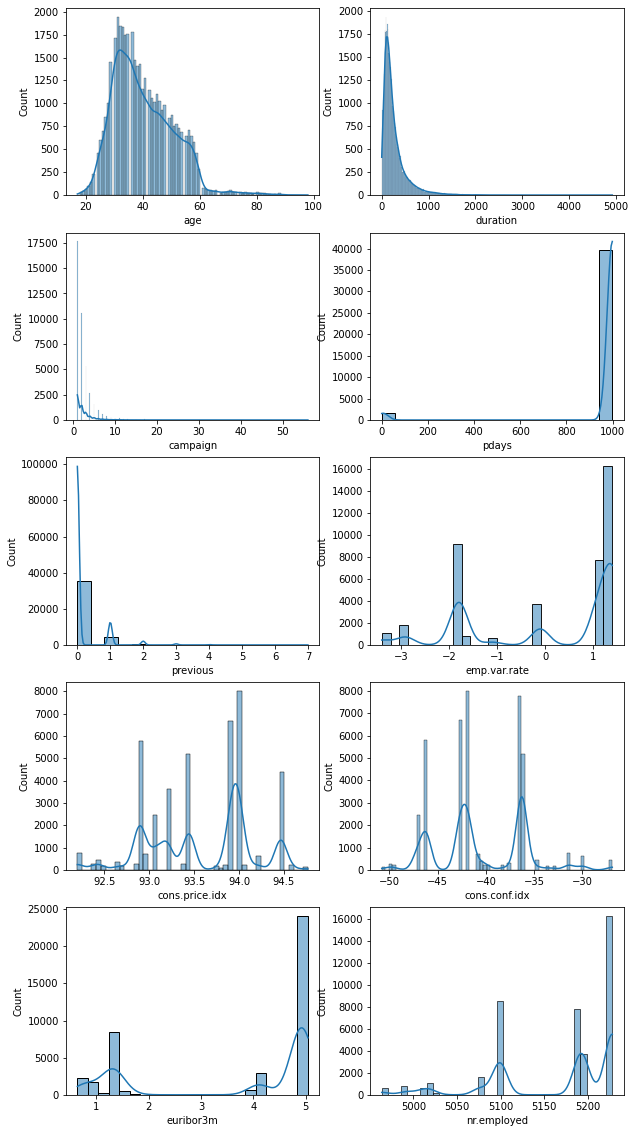

In [24]:
# Plot the numerical values
numerical_features = df.describe()
plt.figure(figsize=(10, 20))

# Let do plot all of the numerical features with write a function :)
for index, col in enumerate(numerical_features):
  plt.subplot(5, 2, index+1)
  sns.histplot(df[col], kde=True)

# plt.savefig('Plot_numerical_Features.png', format='png')

It shows that we have just **normal distribution in the age and duration** columns and other values dont follow normal distribution.

In the next step, I'll discover the **catergorical features** (objects values) in the dataframe and invastigate on them.

## Analyzing Distributions of Categorical Features in the Banking Dataset

In this step, I extract the categorical features with a scalable function and try to find patterns and intuition.

In [25]:
# Sperate Categorical Features 

categorical_features = [col for col in df.columns if pd.api.types.is_string_dtype(df[col]) ]
print(categorical_features)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


In [26]:
len(categorical_features)

11

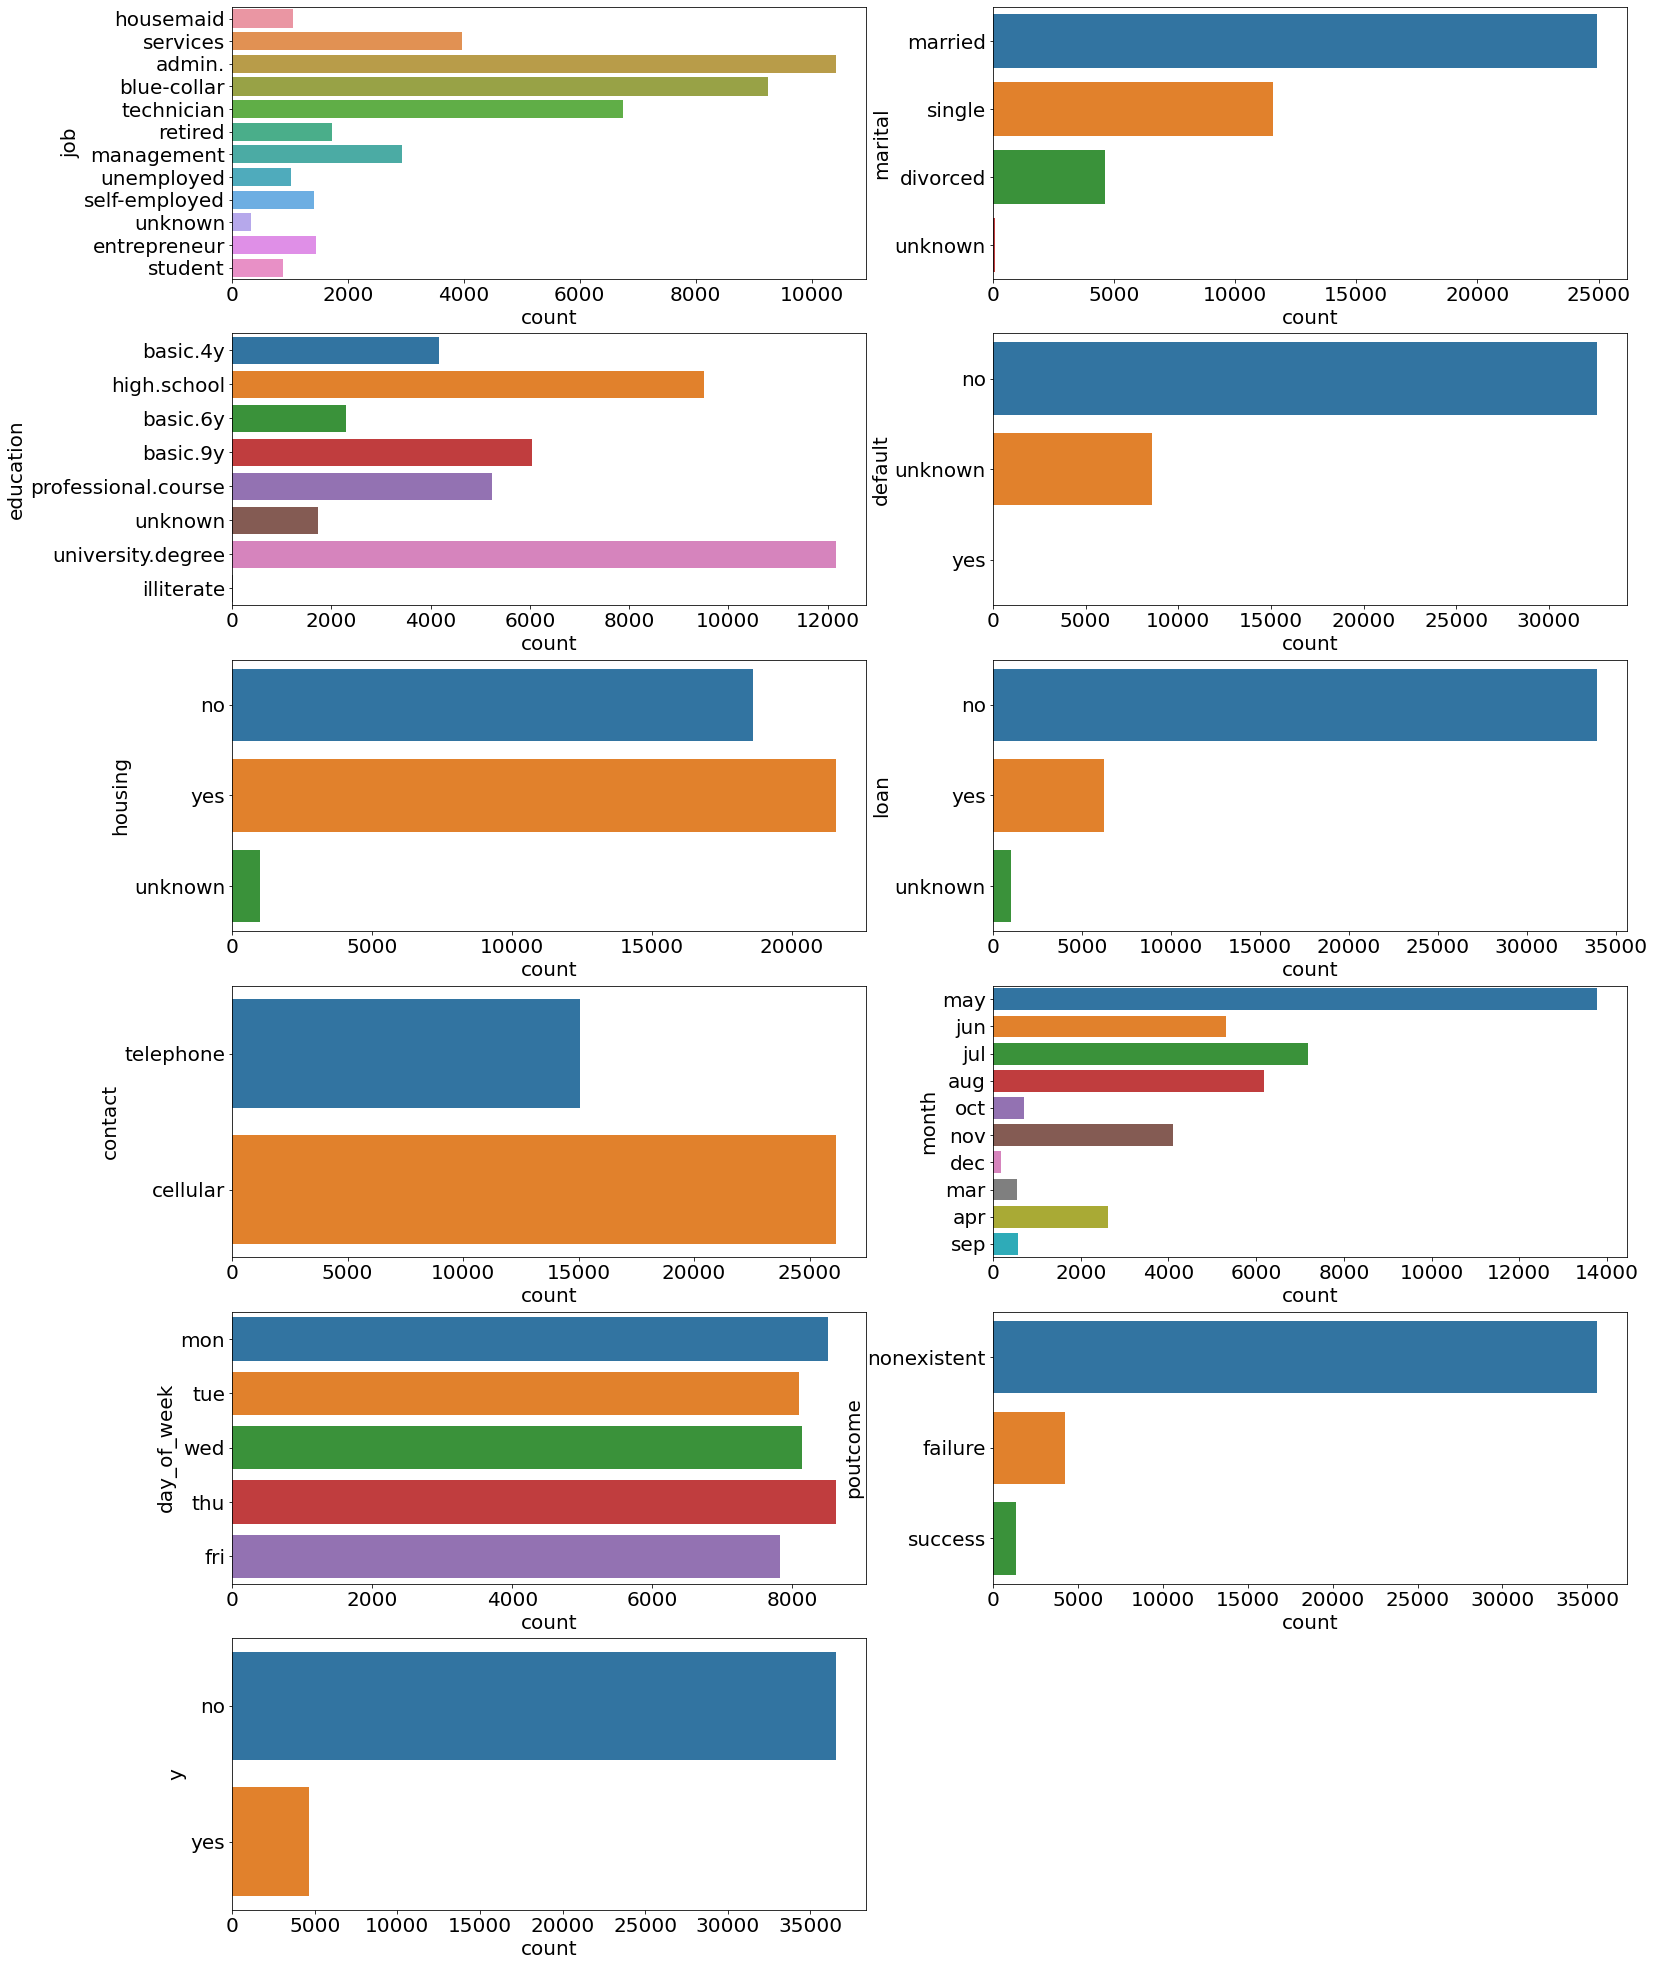

In [27]:
# Like numerical features we should plot them with count plot to count and find important features

plt.figure(figsize=(25, 35))

# Let do plot all of the numerical features with write a function :)
for index, col in enumerate(categorical_features):
  plt.subplot(6, 2, index+1)
  ax = sns.countplot(y=col, data=df)
  ax.set_xlabel("count", fontsize=20)
  ax.set_ylabel(col, fontsize=20)
  ax.tick_params(labelsize=20)

# plt.savefig('Plot_categorical_Features.png', format='png')

In [28]:
# How many Yes is there in the Y column
df.y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

## Invastigate The Relationships Between The Features Columns and Outcome.

In the next section, I'll try to understand these data how can influence on each other and find correlation between them.

For find the correlation between the data, there are a wide range of methods and I'll use two method in this section:

- Violin plots
- Matrix plot

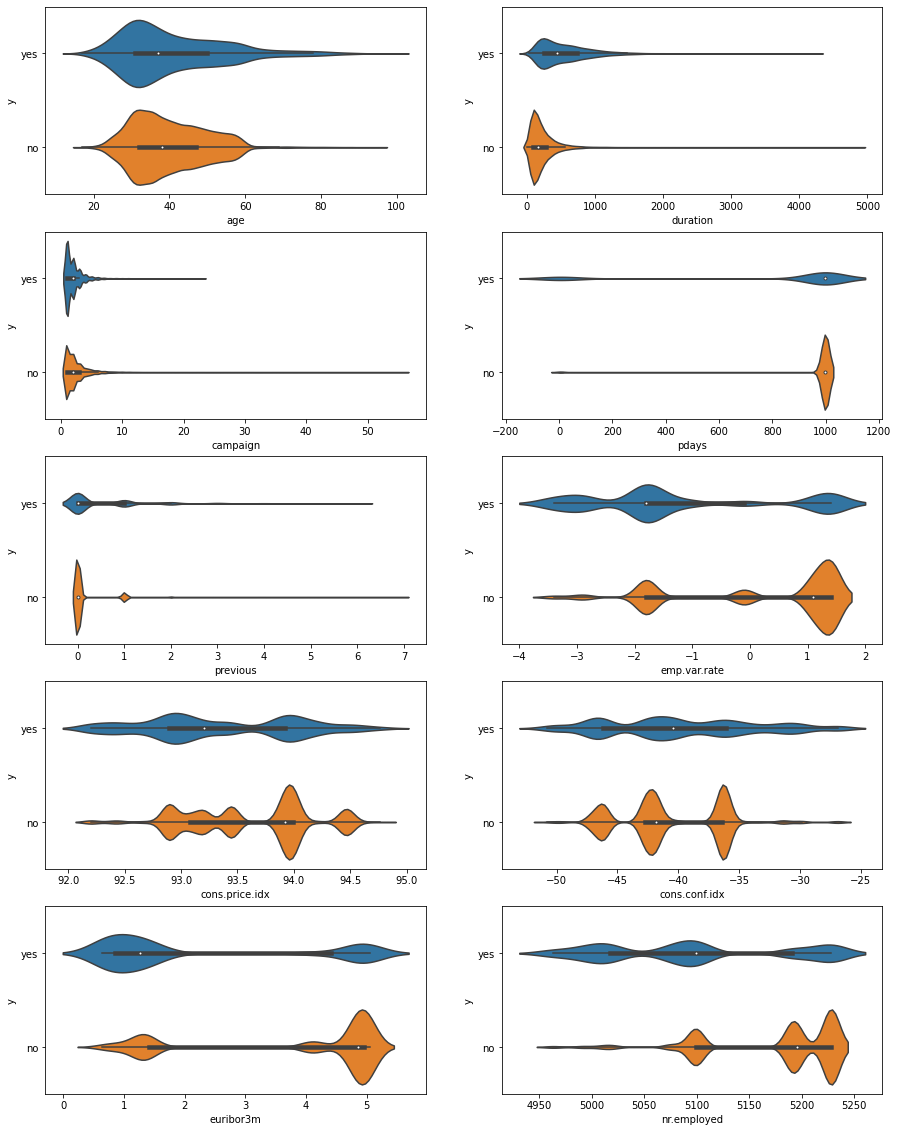

In [29]:
# We use the violin plot at first, so lets go:
plt.figure(figsize=(15, 20))

for index, col in enumerate(numerical_features):
  plt.subplot(5, 2, index+1)
  sns.violinplot(x= col, y= 'y', data=df, order=['yes', 'no'])

# plt.savefig('Plot_violin_plot.png', format='png')

As you can see, we are not able to find speciall pattern in these charts. Most of features vary between in two groups.

SO, in the next step I should investigate on Hypothesis analysis and use the matrix plot in this section.

I will test whether the average value of the respective numerical feature is different for "yes" entries for the y column against "no" entries for each numerical feature.

In [30]:
# Import ttest library 
from scipy.stats import ttest_ind
"""
define function for computing mean of column for yes and no cases,
as well as the test statistics and pvalue for equality of means test

The average is used in this section to compare the mean values of the numerical features for "yes" and "no" entries. 
This allows us to determine if there is a statistically significant difference between the two groups. 
If there is a difference, then it could indicate that the numerical feature has an effect on the outcome of the y column.
"""
def test_means(data, col):
  yes_mask = data["y"] == "yes"
  values_yes = data[col][yes_mask]
  values_no = data[col][~yes_mask]
  mean_yes = values_yes.mean()
  mean_no = values_no.mean()
  ttest_res = ttest_ind(values_yes, values_no)
  return [col, mean_yes, mean_no, round(ttest_res[0], 4), round(ttest_res[1],4)]

In [31]:
# Create pandas dataframe, in which values should be filled
test_df = pd.DataFrame(columns=["column", "mean yes", "mean no", "ttest stat", "ttest pval"])
"""
for each column in the numerical_features, compute means and test
statistics and fill the values in the dataframe
"""
for index, col in enumerate(numerical_features):
  test_df.loc[index] = test_means(df, col)
test_df

,column,mean yes,mean no,ttest stat,ttest pval
0,age,40.913147,39.911185,6.1721,0.0
1,duration,553.191164,220.844807,89.9672,0.0
2,campaign,2.051724,2.633085,-13.4965,0.0
3,pdays,792.035560,984.113878,-69.7221,0.0
4,previous,0.492672,0.132374,48.0027,0.0
5,emp.var.rate,-1.233448,0.248875,-63.4337,0.0
6,cons.price.idx,93.354386,93.603757,-27.9032,0.0
7,cons.conf.idx,-39.789784,-40.593097,11.1539,0.0
8,euribor3m,2.123135,3.811491,-65.6466,0.0
9,nr.employed,5095.115991,5176.166600,-76.9845,0.0


we can infer that there is a statistically significant difference in
the mean values for each of the numerical columns.

This means that for each of the numerical features, the average value for successful marketing campaigns is significantly different than the average value for unsuccessful marketing campaigns.

Moreover, We can not only analyze the difference in means but also the distribution differenc for each numerical column.

## Hypothesis Test of the Difference of Distributions in Numerical Features

I will test the difference between the distributions of successful and unsuccessful marketing calls for each numerical features.

I preform a **Kolmogorov-Smirnov test** to check the equality of distribution for all of the numerical values. 

In [32]:
# Import library to calculate the Kolmogorov-Smirnov test
from scipy.stats import ks_2samp
"""
define function which performs Kolmogorov-Smirnov test,
for provided column
"""
def test_ks(data, col):
  yes_mask = data["y"] == "yes"
  values_yes = data[col][yes_mask]
  values_no = data[col][~yes_mask]
  kstest_res = ks_2samp(values_yes, values_no)
  return [col, round(kstest_res[0], 4), round(kstest_res[1],4)]


In [33]:
# define pandas dataframe, in which values should be filled
test_df = pd.DataFrame(columns=["column", "ks stat", "ks pval"])
"""
for each column in the numerical_features,
compute test statistics and fill the values in the dataframe

KS stat and KS pval are the two outputs of the ks_2samp function of scipy.stats. 
KS stat is the Kolmogorov-Smirnov statistic, which is a measure of how well two samples fit a given distribution. 
KS pval is the p-value associated with the KS statistic, which indicates the probability that the two samples come from the same distribution.
"""
for index, col in enumerate(numerical_features):
  test_df.loc[index] = test_ks(df, col)
test_df

,column,ks stat,ks pval
0,age,0.0861,0.0
1,duration,0.4641,0.0
2,campaign,0.0808,0.0
3,pdays,0.1934,0.0
4,previous,0.2102,0.0
5,emp.var.rate,0.4324,0.0
6,cons.price.idx,0.2281,0.0
7,cons.conf.idx,0.1998,0.0
8,euribor3m,0.4326,0.0
9,nr.employed,0.4324,0.0


we can also observe that the distributions of the various numerical features present a significant difference between successful and unsuccessful marketing campaigns.

For deeper analysis use the pairplot and divide our data to two groups:

- campaign-related features

- financial features


<Figure size 720x720 with 0 Axes>

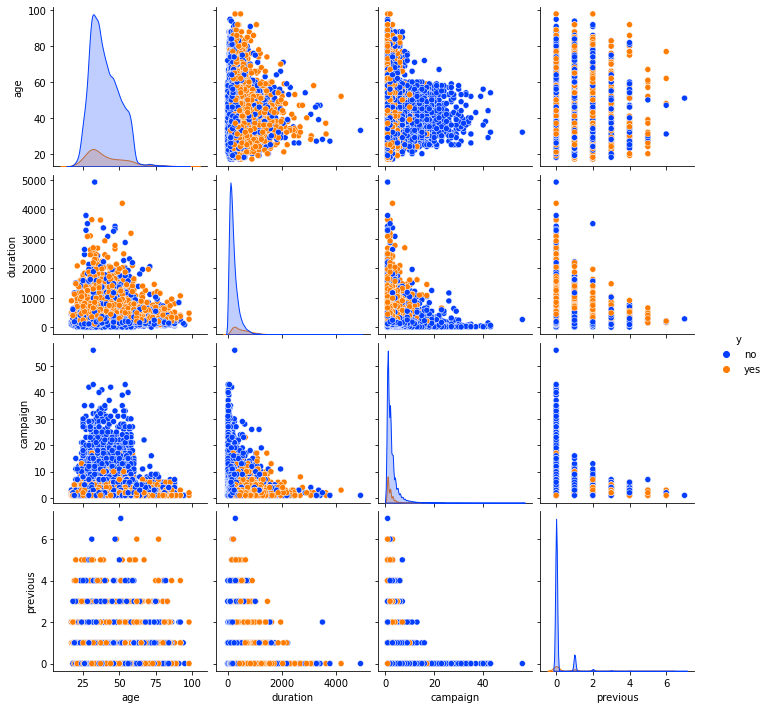

<Figure size 720x720 with 0 Axes>

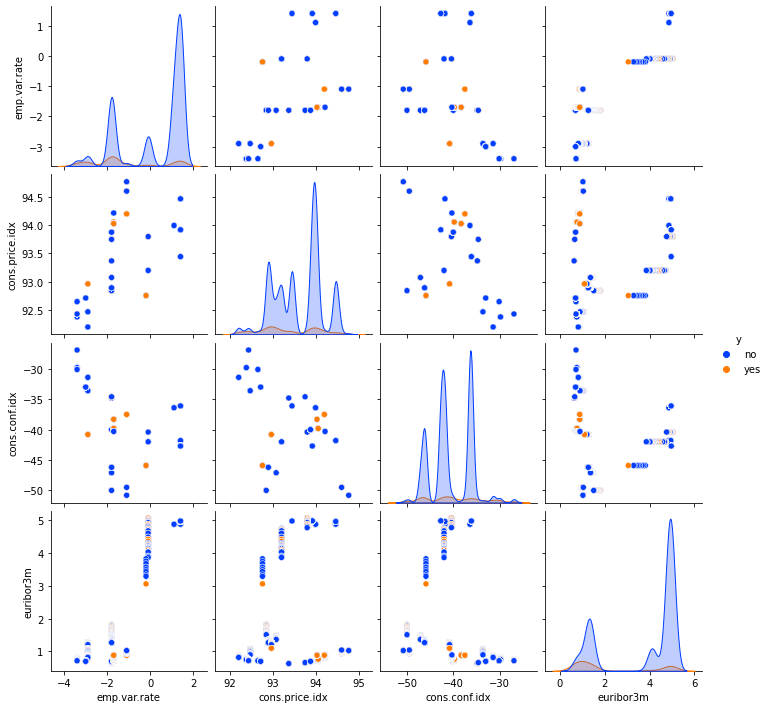

In [42]:
# create arrays containing cambaing and financial columns
campaign_columns = ["age", "duration", "campaign", "previous"]
financial_columns = ["emp.var.rate", "cons.price.idx", \
                     "cons.conf.idx", "euribor3m"]

# create pairplot between campaign columns
plot_data = df[campaign_columns + ["y"]]
plt.figure(figsize=(10,10))
sns.pairplot(plot_data, hue="y", palette="bright")
# plt.savefig("pairplot_campaign.png", format="png")

# create pairplot between financial features
plot_data = df[financial_columns + ["y"]]
plt.figure(figsize=(10,10))
sns.pairplot(plot_data, hue="y", palette="bright")
# plt.savefig("pairplot_financial.png", format="png")

We can see that in previous column, most of the successful marketing campaigns were with newly contacted customers, while a substantial peak is present for customers who were contacted the second time, but without success.


**In the second chart:**

for lower values for the 3-month interest rates (euribor3m) the number of successful marketing calls is larger than the number of unsuccessful ones. we can explain it by  customer optimism when interest rates are lower. customer optimism when interest rates
are lower.




**Next Step**

Analyze the correlations between the different numerical features. This is important so that we have a clear picture of how the different features behave with respect to each other.

In [48]:
# create mask for successful calls
successful_calls = df.y == "yes"
# plot correlation matrix for successful calls
plot_data = df[campaign_columns + financial_columns][successful_calls]
successful_corr = plot_data.corr()
successful_corr.style.background_gradient(cmap='coolwarm').set_precision(2)


<ipython-input-48-01254807625e>:6: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  successful_corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
age,1.00,-0.06,-0.01,0.07,-0.08,-0.02,0.14,-0.09
duration,-0.06,1.00,0.16,-0.23,0.50,0.24,-0.14,0.50
campaign,-0.01,0.16,1.00,-0.10,0.22,0.12,-0.04,0.21
previous,0.07,-0.23,-0.10,1.00,-0.28,0.09,0.13,-0.39
emp.var.rate,-0.08,0.50,0.22,-0.28,1.00,0.66,-0.27,0.93
cons.price.idx,-0.02,0.24,0.12,0.09,0.66,1.00,-0.33,0.41
cons.conf.idx,0.14,-0.14,-0.04,0.13,-0.27,-0.33,1.00,-0.12
euribor3m,-0.09,0.50,0.21,-0.39,0.93,0.41,-0.12,1.00


In [49]:
# plot correlation matrix for unsuccessful calls
plot_data = df[campaign_columns + financial_columns][~successful_calls]
unsuccessful_corr = plot_data.corr()
unsuccessful_corr.style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-49-46ea46845444>:4: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  unsuccessful_corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
age,1.00,0.00,0.01,-0.00,0.03,0.01,0.12,0.04
duration,0.00,1.00,-0.08,-0.00,0.00,0.02,0.00,0.01
campaign,0.01,-0.08,1.00,-0.07,0.13,0.12,-0.01,0.12
previous,-0.00,-0.00,-0.07,1.00,-0.42,-0.27,-0.14,-0.44
emp.var.rate,0.03,0.00,0.13,-0.42,1.00,0.80,0.32,0.98
cons.price.idx,0.01,0.02,0.12,-0.27,0.80,1.00,0.15,0.73
cons.conf.idx,0.12,0.00,-0.01,-0.14,0.32,0.15,1.00,0.39
euribor3m,0.04,0.01,0.12,-0.44,0.98,0.73,0.39,1.00


At the first glance we can infer that, the correlation between euribor3m and emp.var.rate is very high (approximately 0.93 for successful and 0.98 for unsuccessful calls)


Also, A positive correlation between those values means that in an expanding economy, in which more people are hired than fired (hence, the positive values in emp.var.rate), interest rates tend to be higher.


**A high positive correlation** of the **cons.price.idx** column with the **emp.var.rate** and **euribor3m** columns is a **clear indicator** of an **expanding economy**, in which growing employment means more people with money—hence more spending and higher inflation.

In [50]:
# In the next step: returning to our marketing campaign problem, consider the difference between the correlation matrices for successful and unsuccessful calls:
'''
Calculating the difference between the correlation matrices for successful and unsuccessful calls can help us identify 
which factors are most influential in determining whether a call is successful or not. By understanding which factors are most important, 
we can then focus our efforts on improving those specific areas to increase the success rate of our calls. 
Additionally, this analysis can help us identify any potential issues that may be causing our calls to be unsuccessful, 
allowing us to address them and improve our overall success rate.
'''

"""
plot difference of successful - unsuccessful correlation matrices
"""
diff_corr = successful_corr - unsuccessful_corr
diff_corr.style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-50-4a1336e9aee9>:14: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  diff_corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
age,0.00,-0.06,-0.02,0.08,-0.11,-0.04,0.02,-0.13
duration,-0.06,0.00,0.24,-0.23,0.50,0.22,-0.15,0.49
campaign,-0.02,0.24,0.00,-0.04,0.09,-0.01,-0.04,0.10
previous,0.08,-0.23,-0.04,0.00,0.14,0.36,0.27,0.05
emp.var.rate,-0.11,0.50,0.09,0.14,0.00,-0.14,-0.59,-0.05
cons.price.idx,-0.04,0.22,-0.01,0.36,-0.14,0.00,-0.48,-0.32
cons.conf.idx,0.02,-0.15,-0.04,0.27,-0.59,-0.48,0.00,-0.51
euribor3m,-0.13,0.49,0.10,0.05,-0.05,-0.32,-0.51,0.00


This chart provide useful information about strong differences in correlations
between successful and unsuccessful calls.

Also, there is a significant difference in the correlations between euribor3m column and emp.var.rate with duration, so we can expect successful calls
to have a longer duration.

On theother hand. emp.var.rate is an economic parameters which not any effect in the duration, we should not forget correlation is not causation. :)

How can deal with the causalities? come to the next part with me 